In [1]:
import sympy
from sympy import MatrixSymbol
from sympy.matrices.expressions import Trace
sympy.init_printing()

The least squares for classification model is defined as a linear model of the form

$$
    y_k({\bf x}) = {\bf w}_k^T{\bf x} + w_{k0}
$$

To group all these elements, we consider the matrices $T \in \mathcal{M}_{N, K}(\{0, 1\})$ and $\tilde{\bf X} \in \mathcal{M}_{N, D + 1}(\mathbb{R})$. The error function is then defined as
    
$$
    E_D(\tilde{\bf W}) = \frac{1}{2}\text{Tr}\left\{\left(\tilde{\bf X}\tilde{\bf W} - T\right)^T\left(\tilde{\bf X}\tilde{\bf W} - T\right)\right\} 
$$

Where $\tilde{\bf W} \in \mathcal{M}_{D+1, K}(\mathbb{R})$

In [2]:
D, N, K = 3, 5, 2

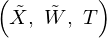

In [3]:
X = MatrixSymbol(r"\tilde X", N, D + 1)
W = MatrixSymbol(r"\tilde W", D + 1, K)
T = MatrixSymbol("T", N, K)

X, W, T

In [4]:
Err = (X @ W - T).T @ (X @ W - T)

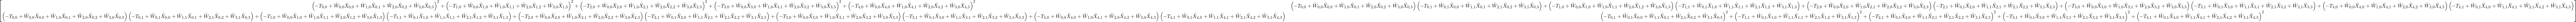

In [5]:
Err.as_explicit()

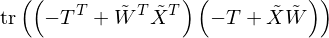

In [6]:
Trace(Err)

Each of the elements inside the representation of the trace takes the form

$$
    (\tilde w^T_k\tilde x^{(n)} - T^{(n)}_k)^2
$$

Where
* $\tilde w^T_k\tilde x^{(n)}$ is the model prediction for the $n$-th observation considering the $k$-th model
* $T^{(n)}_k$ is whether the $n$-th observation is of class $k$.

Thus, we would like to find $\tilde{\bf W}$ such that, $\forall \ k, n$,
$$
    \tilde w^T_k\tilde x^{(n)} \approx 1 \iff T^{(n)}_k = 1
$$

$$
    \tilde w^T_k\tilde x^{(n)} \approx 0 \iff T^{(n)}_k = 0
$$

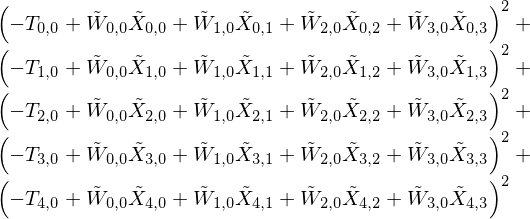

In [7]:
Err[0,0]

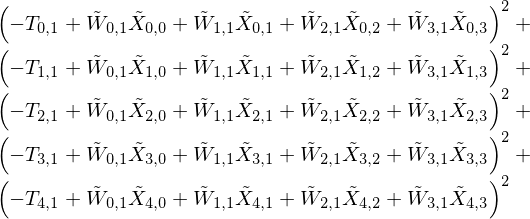

In [8]:
Err[1, 1]

In [9]:
Err.shape

## Understanding the Derivative
$$
    \frac{\partial}{\partial \tilde{\bf W}}\text{Tr}\left\{\left(\tilde{\bf X}\tilde{\bf W} - T\right)^T \left(\tilde{\bf X}\tilde{\bf W} - T\right)\right\} = 2\tilde{\bf X}^T\left(\tilde{\bf X} \tilde{\bf W} - T\right)
$$

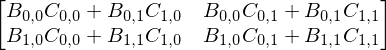

In [12]:
B = MatrixSymbol("B", 2, 2)
C = MatrixSymbol("C", 2, 2)

A = (B @ C).as_explicit()
A

In [16]:
trAA = A.T @ A
trAA = trAA[0, 0] + trAA[1, 1]

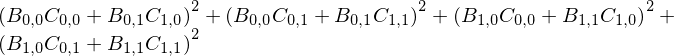

In [17]:
trAA

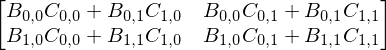

In [20]:
(B @ C).as_explicit()